In [91]:
##Importing  necessary libraries:--

import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [94]:
df=pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv')
df.shape

(891, 12)

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [98]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [99]:
import missingno as mno

<function matplotlib.pyplot.show(close=None, block=None)>

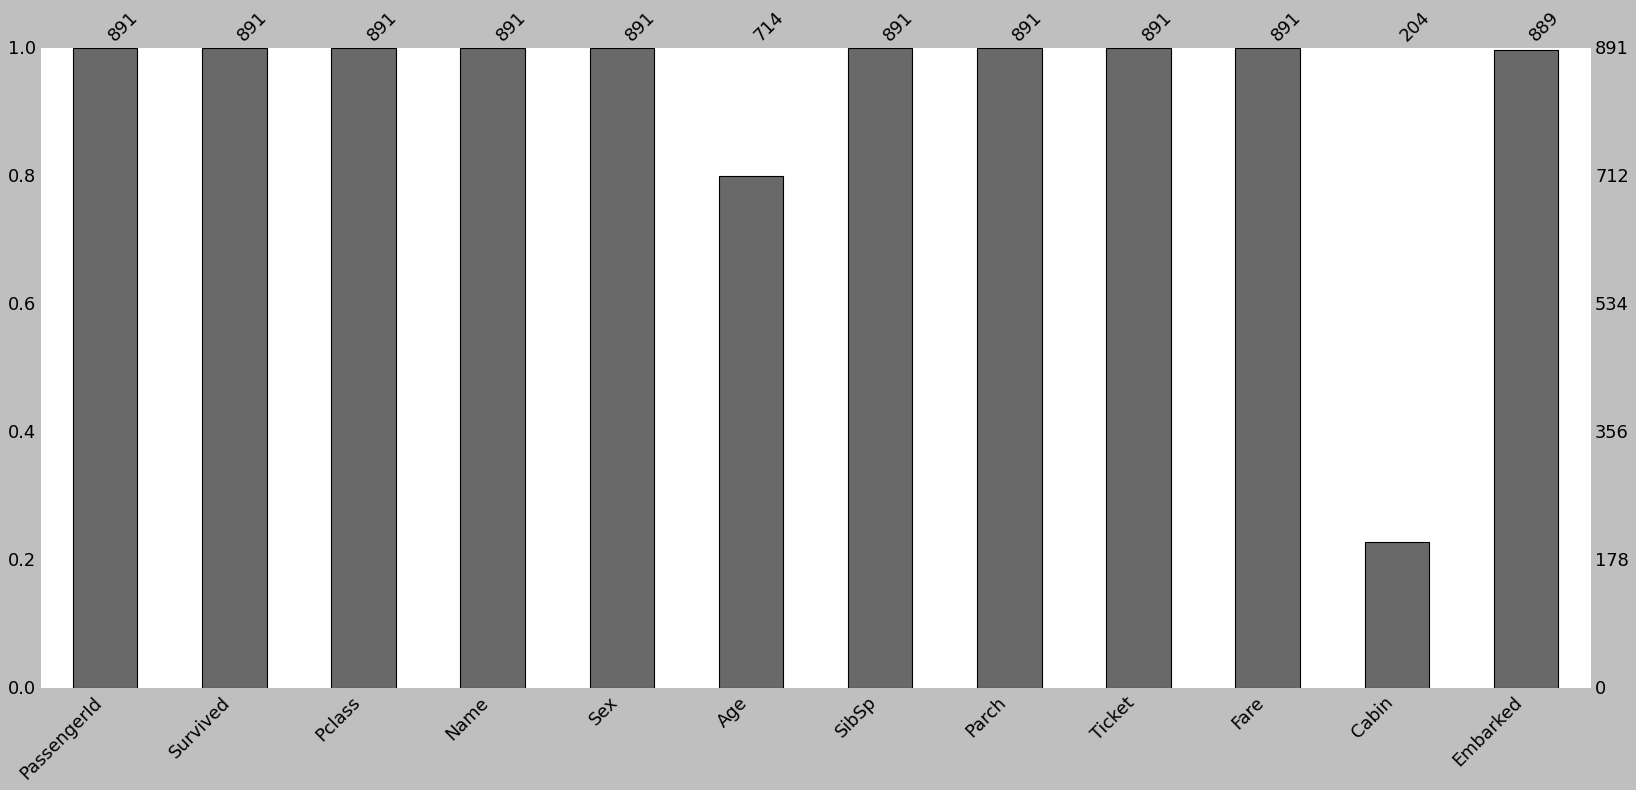

In [100]:
plt.style.use('classic')
mno.bar(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

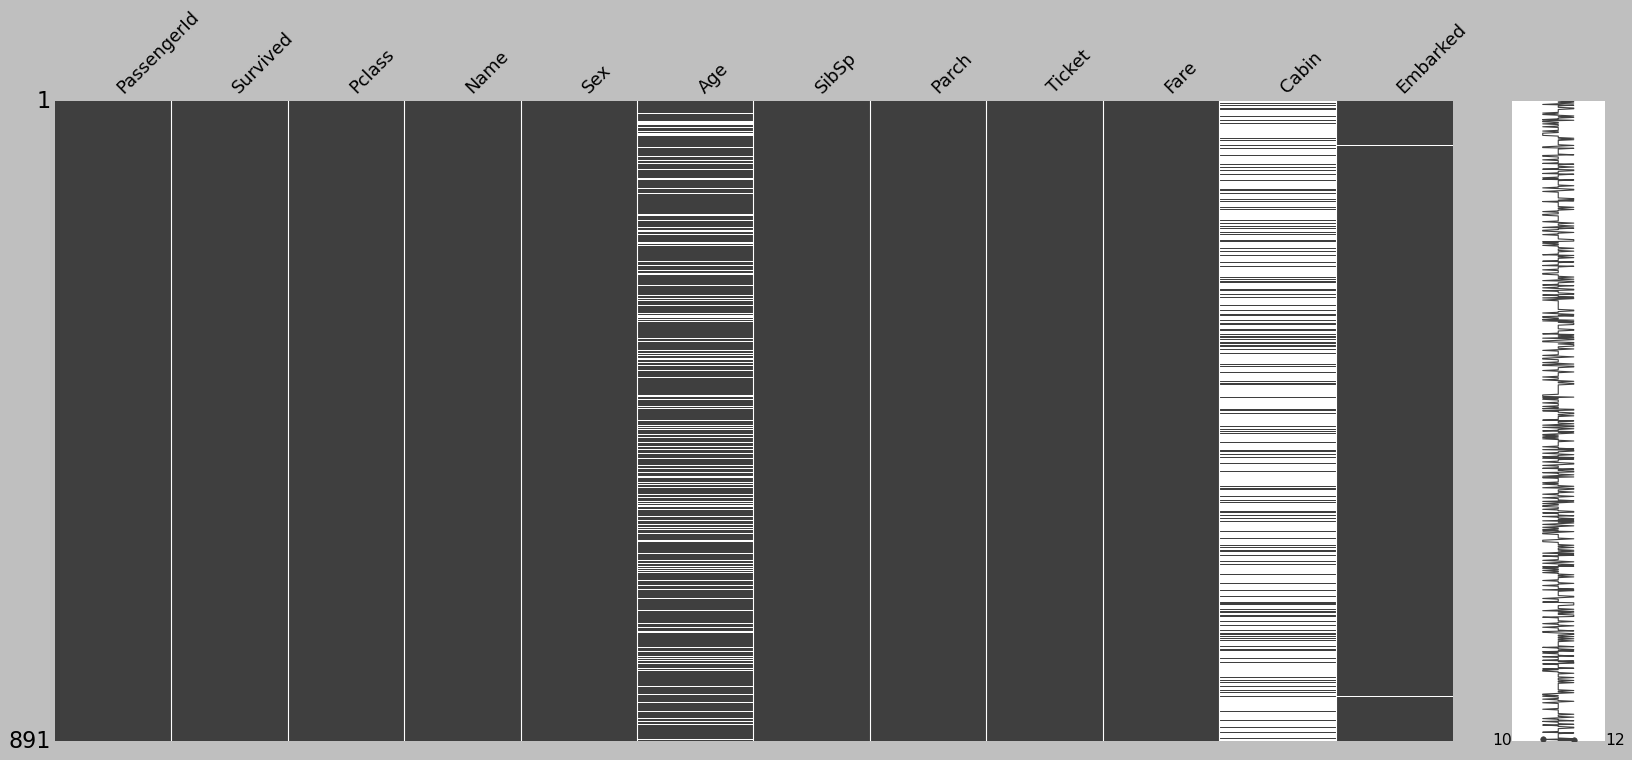

In [101]:
plt.style.use('classic')
mno.matrix(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

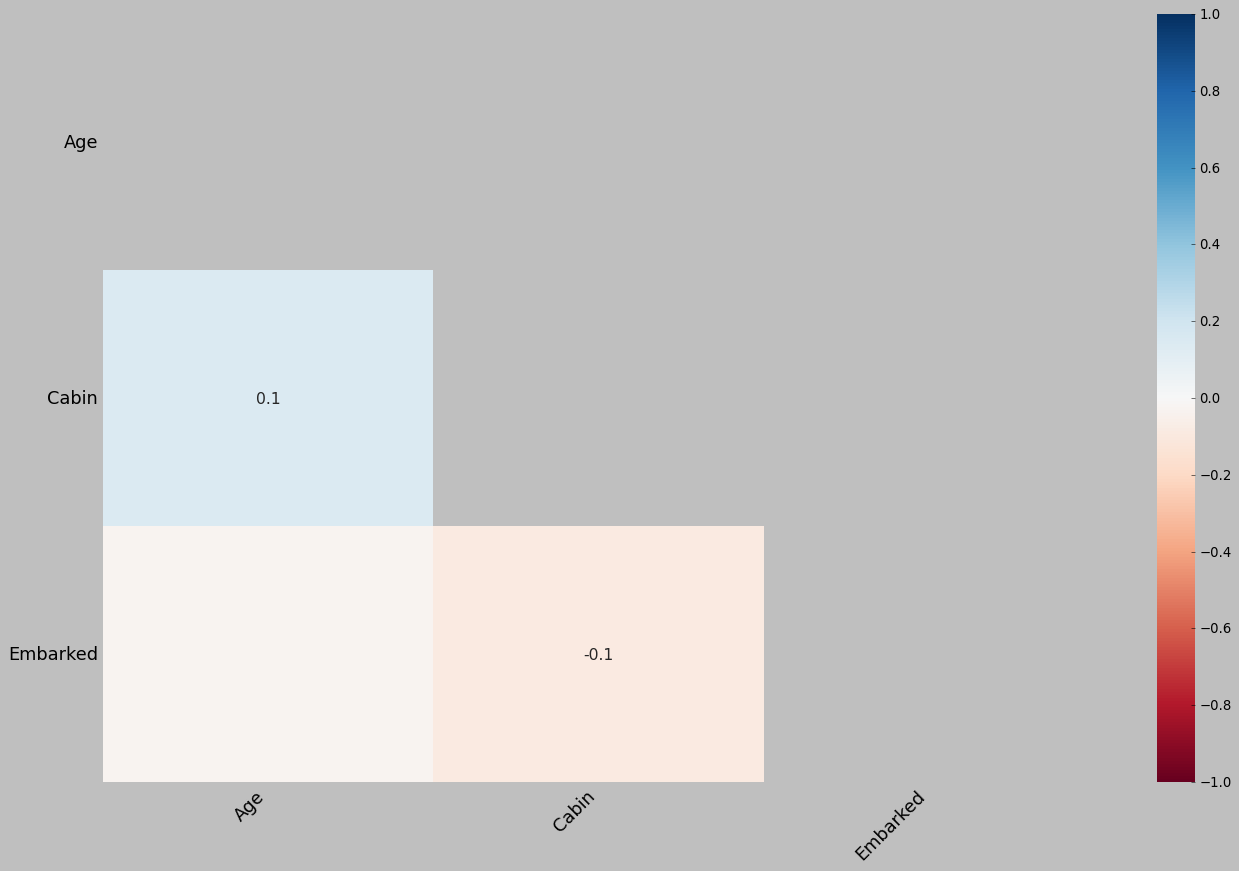

In [102]:
plt.style.use('classic')
mno.heatmap(df)
plt.show

In [42]:
df.drop(['Cabin'],axis=1,inplace=True)


In [43]:
df.shape


(891, 11)

In [44]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [48]:
df.Embarked.mode()[0]

'S'

In [49]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)


In [50]:
df.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [51]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

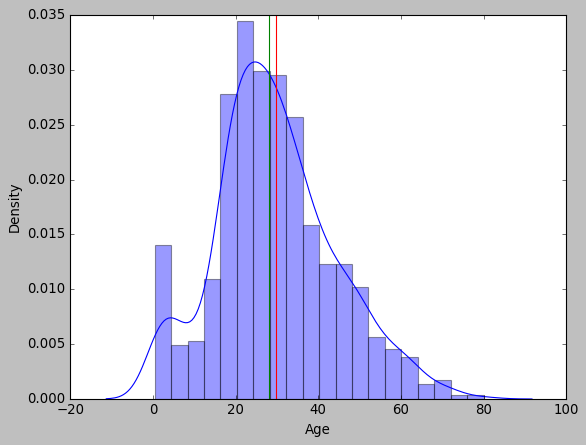

In [52]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(), color='Green')
plt.show()

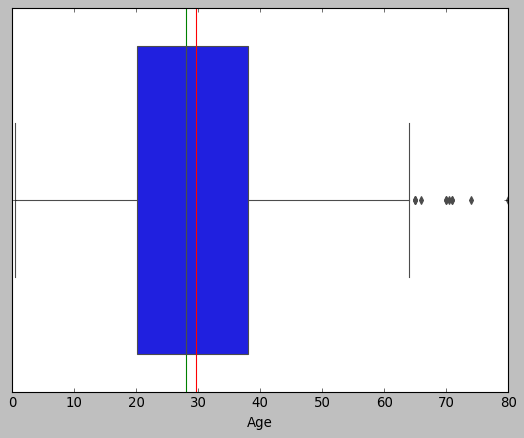

In [53]:
sns.boxplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(), color='Green')
plt.show()

In [54]:
df.Age.fillna(df.Age.median(),inplace=True)

In [55]:
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
##Feature Engineering!!!
##Create a new feature name Familysize

In [57]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [60]:
df['Familysize']=df.SibSp+df.Parch+1
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


In [64]:
##Segment Sex column as per Age
df['GenderClass']=df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis=1)


In [65]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,GenderClass
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.000,S,1,male
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,S,2,male
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.775,S,1,female
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.150,S,3,male


In [66]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [67]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

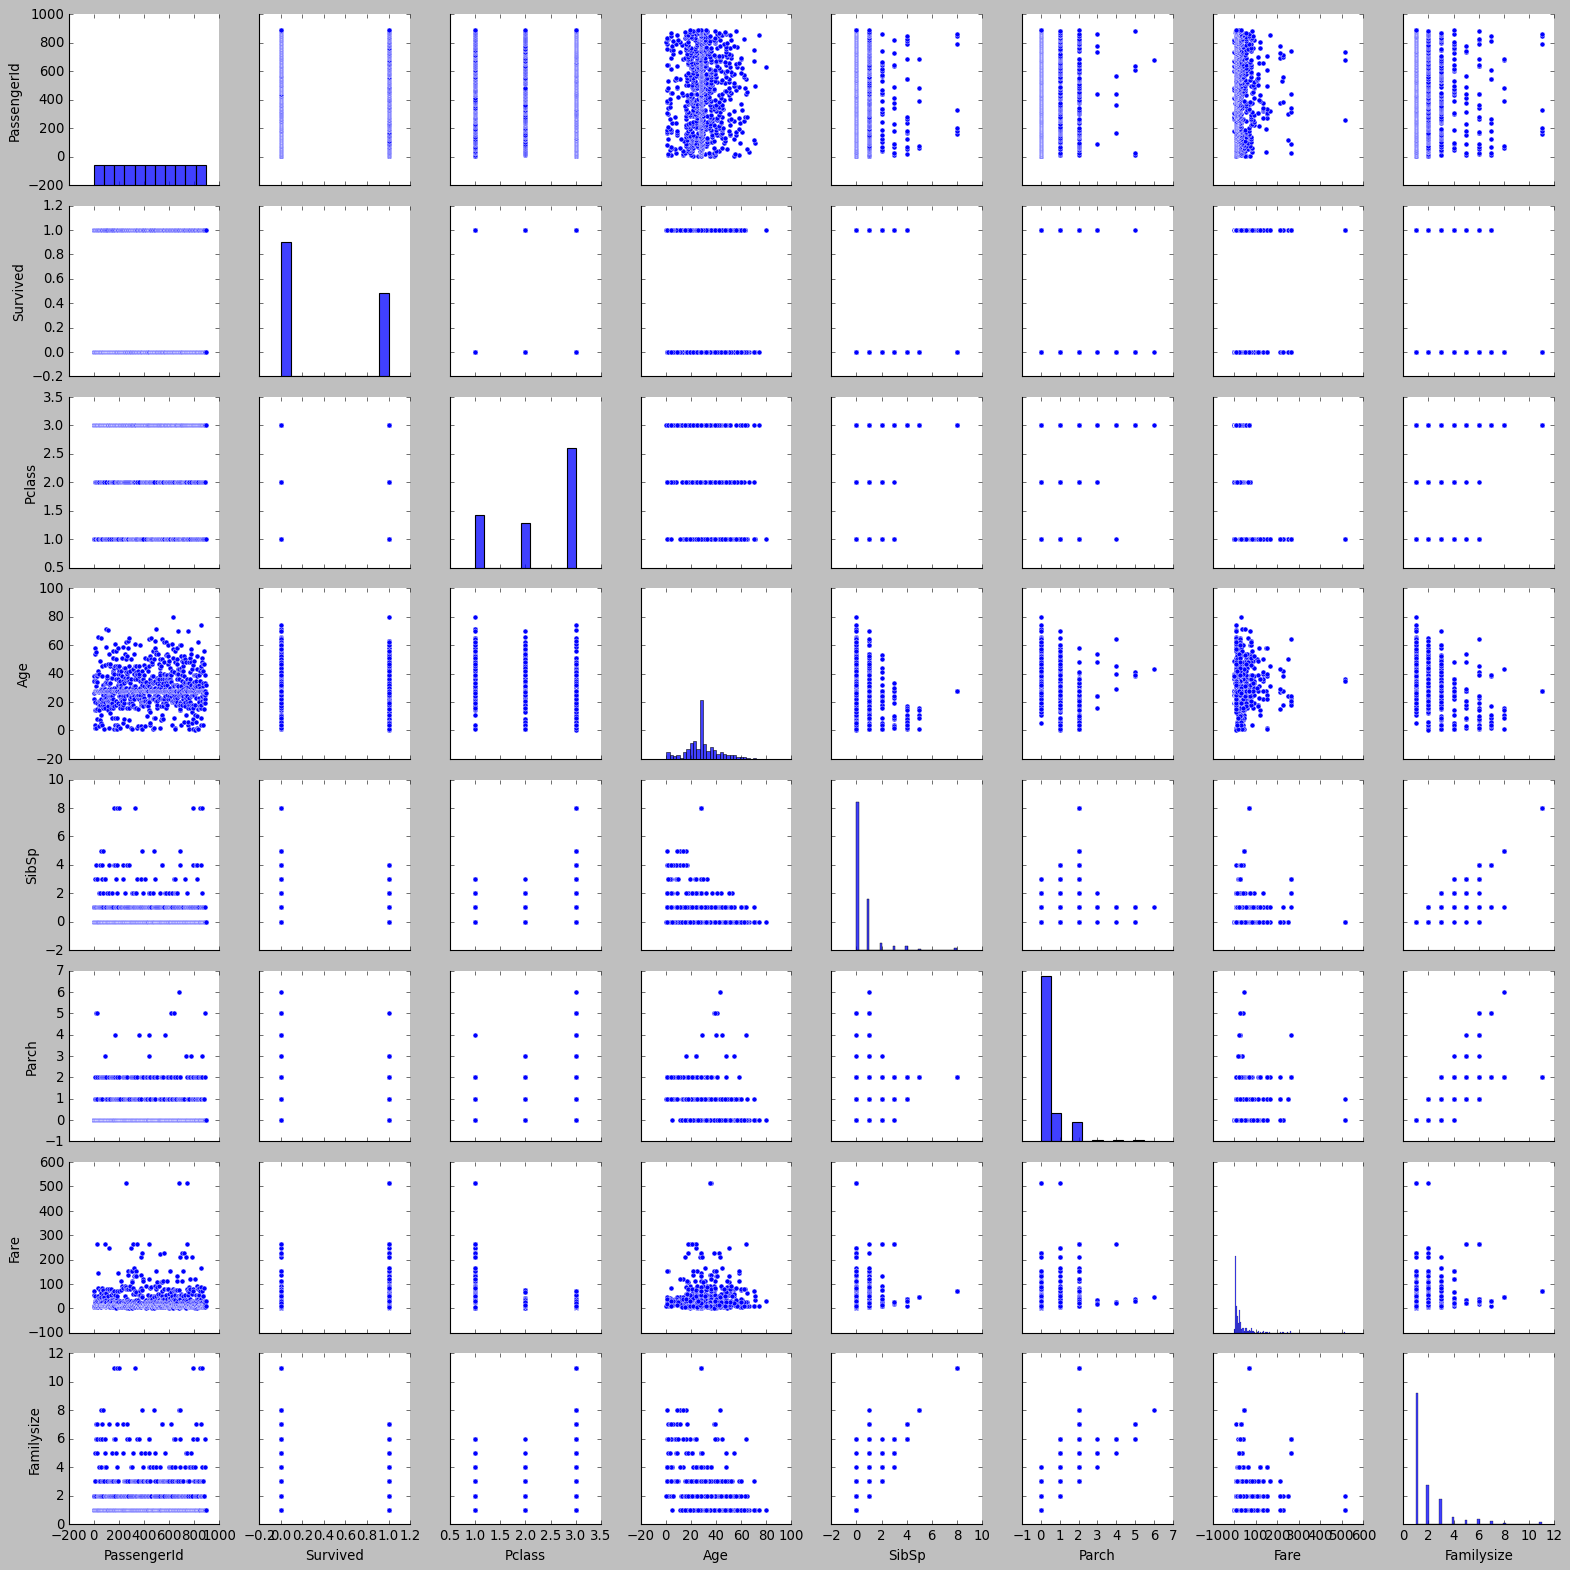

In [70]:
sns.pairplot(df)
plt.show()

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Familysize', 'GenderClass'],
      dtype='object')

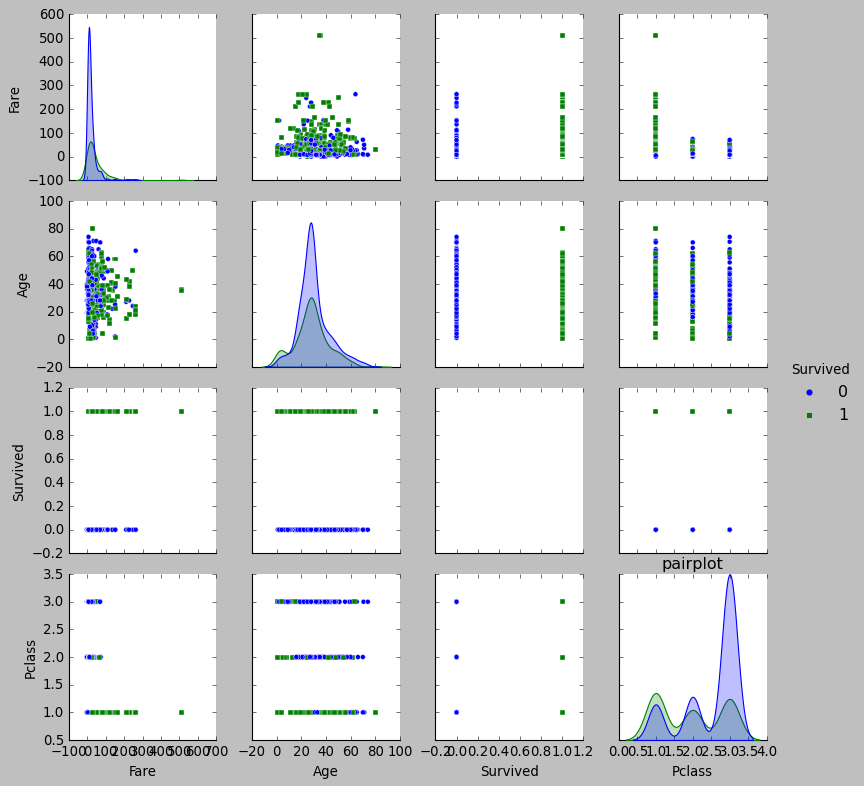

In [74]:
sns.pairplot(df[['Fare','Age', 'Survived', 'Pclass']], vars=['Fare','Age', 'Survived', 'Pclass'], hue='Survived',markers=['o','s'])
plt.title('pairplot')
plt.show()

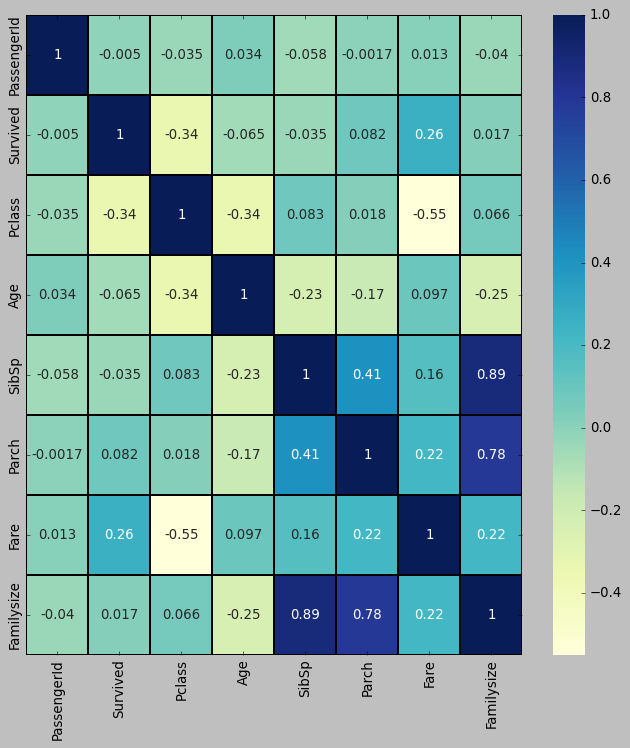

In [82]:
Cor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Cor,linewidth=0.01,annot=True, cmap='YlGnBu',linecolor='Black')
plt.show()

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [84]:
df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818,2.343949
male,454.147314,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893,1.665511


In [86]:
df.groupby(['Sex']).mean()[['Survived']]

,Survived
Sex,
female,0.742038
male,0.188908


In [89]:
df.groupby(['GenderClass','Pclass']).mean()[['Survived']]

Survived
GenderClass Pclass          
child       1       0.800000
            2       1.000000
            3       0.407407
female      1       0.978261
            2       0.909091
            3       0.504274
male        1       0.352941
            2       0.080808
            3       0.118750

In [90]:
df.groupby(['GenderClass','Pclass']).mean()[['Survived']].unstack()

Survived                    
Pclass              1         2         3
GenderClass                              
child        0.800000  1.000000  0.407407
female       0.978261  0.909091  0.504274
male         0.352941  0.080808  0.118750